<a href="https://colab.research.google.com/github/Location-Artistry/GEO-DEV-NOTEBOOKS/blob/main/Public_Lands_in_NHBP_Ceded_Territories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PUBLIC LANDS IN NHBP CEDED TERRITORIES**   
## Nottawaseppi Huron Band of the Potawatomi    
## Environmental Department - Mno Ki Nenyak
## November 2020   


Data Sources: Conservation and Recreation Lands (CARL - Fee and Other)   
State of Michigan GIS Open Data: https://gis-michigan.opendata.arcgis.com/datasets/midnr::conservation-and-recreation-lands-fee-and-other   
Michigan Treaty Boundaries: NHBP - GeoReferenced from 1896-1897 Indian Land Cessions in the United States, Royce Map, Smithsonian Institution.   



---



## Pre-Processing Area

In [ ]:
# Workflow Section
# Get Public Lands Layer, clipped to Treaty Boundaries with ArcGIS Pro
userLogin()
landsID = searchByKeywords(gis, 'Public_Lands')

ArcGIS Online USER ID: ekerney_nhbptribe
PASSWORD: ··········
SUCCESS - CONNECTED TO: ekerney_nhbptribe ACCOUNT as <gis>
GIS @ https://nhbptribe.maps.arcgis.com version:8.3
Additional User Login(YES/NO)? no
YOU MAY NOW PROCEED...
0 - Public_Lands_Ceded - c2f3a1f78bad435a95785650830a7707 - Shapefile - [] - 2020-12-07 20:35:29
1 - Public_Lands_Ceded - fb6d59f3007846b1af7caf4d4a535bc0 - Feature Service - [] - 2020-11-04 03:54:13
2 - Public_Lands_Ceded - 90ae85f70ce34e40ac73f6c2615bc555 - Shapefile - [] - 2020-12-04 17:38:31
3 - Public Land Survey Sections - Michigan - 619403de1fa342ab9e45063bd0675949 - Feature Service - [] - 2017-10-05 16:54:14


In [ ]:
# generate GeoDataframe from clipped public lands layer
gdf = FeatServiceToGDF(gis, landsID[1].id)
# conversion worked, and was fairly quick

Downloading: Public_Lands_Ceded to /data directory
Export Format (Shapefile, CSV, GeoJson, KML, Excel): Shapefile
list of Files extracted to: /data/Public_Lands_Ceded
['Conservation_and_Recreation_.shx', 'Conservation_and_Recreation_.prj', 'Conservation_and_Recreation_.shp', 'Conservation_and_Recreation_.dbf', 'Conservation_and_Recreation_.shp.xml', 'Conservation_and_Recreation_.cpg']
GeoDataFrame Returned!


In [ ]:
# eliminate Indiana Records
gdf = gdf[gdf['state_nm'] == 'Michigan']
# reduce the number of columns
gdfCol = ['sitename','CARL_MGR','CARL_OWN','acres','category','mgmt_desc','mgmt_type','state_nm','mgr_name','own_name','geometry']
gdf = gdf[gdfCol]
gdf.head().T

,3,4,5,6,7
sitename,Hidden Lake Gardens,Round Lake Park,Arboretum,Wolf Lake State Fish Hatchery,Orchard Lake MDNR Public Access
CARL_MGR,State,County,State,State,State
CARL_OWN,State,County,State,State,State
acres,648.173,1.69345,172.731,279.038,8.16316
category,Fee,Fee,Fee,Fee,Fee
mgmt_desc,Botanical/Arboretum Garden,Park,Botanical/Arboretum Garden,Fish Hatchery,Access Point
mgmt_type,Conservation,Recreation,Conservation,Other,Recreation
state_nm,Michigan,Michigan,Michigan,Michigan,Michigan
mgr_name,Other or Unknown State Land,County Land,Other or Unknown State Land,State Department of Natural Resources,State Department of Natural Resources
own_name,Other or Unknown State Land,County Land,Other or Unknown State Land,State Department of Natural Resources,State Department of Natural Resources


In [ ]:
# get largest public lands
# pre join 13 records > 5000 including Ft. Custer
bigLands = gdf[gdf['acres'] > 5000]
display(bigLands.shape, bigLands['acres'].sum())
#bigLands
huronAcres = 978899.667982
display(int(bigLands['acres'].sum() - huronAcres))
bigLands.sort_values(by = 'acres') 

(13, 11)

1145339.56232169

166439

,sitename,CARL_MGR,CARL_OWN,acres,category,mgmt_desc,mgmt_type,state_nm,mgr_name,own_name,geometry
124,Pointe Mouillee State Game Area,State,State,5220.727479,Fee,Wildlife Reserve,Conservation,Michigan,State Fish and Wildlife,State Department of Natural Resources,"MULTIPOLYGON (((-83.22323 41.98919, -83.22325 ..."
123,Waterloo State Wildlife Area,State,State,5611.752237,Fee,Wildlife Habitat Management Area,Conservation,Michigan,State Fish and Wildlife,State Department of Natural Resources,"MULTIPOLYGON (((-84.20997 42.35053, -84.21483 ..."
73,Highland Recreation Area,State,State,5972.153026,Fee,Recreation Area,Recreation,Michigan,State Park and Recreation,State Department of Natural Resources,"POLYGON ((-83.60223 42.62388, -83.60220 42.623..."
111,Port Huron State Game Area,State,State,6676.324055,Fee,Game Area,Conservation,Michigan,State Fish and Wildlife,State Department of Natural Resources,"MULTIPOLYGON (((-82.56931 42.98098, -82.56915 ..."
282,CTC Fort Custer Trng Center,Federal,Federal,7502.693990,Fee,Military Reservation,Conservation,Michigan,Department of Defense,Department of Defense,"POLYGON ((-85.29765 42.33185, -85.29765 42.331..."
106,Minden City State Game Area,State,State,7852.396555,Fee,Game Area,Conservation,Michigan,State Fish and Wildlife,State Department of Natural Resources,"MULTIPOLYGON (((-82.82107 43.57518, -82.82118 ..."
103,Lapeer State Game Area,State,State,8554.651985,Fee,Game Area,Conservation,Michigan,State Fish and Wildlife,State Department of Natural Resources,"MULTIPOLYGON (((-83.34697 43.12284, -83.34693 ..."
75,Pinckney Recreation Area,State,State,10615.932474,Fee,Recreation Area,Recreation,Michigan,State Park and Recreation,State Department of Natural Resources,"MULTIPOLYGON (((-84.06400 42.36396, -84.06393 ..."
78,Waterloo Recreation Area,State,State,15792.031892,Fee,Recreation Area,Recreation,Michigan,State Park and Recreation,State Department of Natural Resources,"MULTIPOLYGON (((-84.25130 42.29679, -84.25130 ..."
84,Barry State Game Area,State,State,16579.657764,Fee,Game Area,Conservation,Michigan,State Fish and Wildlife,State Department of Natural Resources,"MULTIPOLYGON (((-85.50303 42.56287, -85.50246 ..."


In [ ]:
# now get royce treaty layer from AGOL
treatyID = 'a6deb9880f84418ea0364d4f153a65d1'
gdf2 = FeatServiceToGDF(gis, treatyID)

Downloading: ROYCE2 to /data directory
Export Format (Shapefile, CSV, GeoJson, KML, Excel): Shapefile
list of Files extracted to: /data/ROYCE2
['ROYCE2.prj', 'ROYCE2.cpg', 'ROYCE2.shp', 'ROYCE2.dbf', 'ROYCE2.shx']
GeoDataFrame Returned!


In [ ]:
# remove uneccesary columns before join
gdf2Col = ['NAME','geometry']
gdf2 = gdf2[gdf2Col]
# Keep only NHBP Ceded Territories
treaties = ['Detroit Treaty 1807','CHICAGO TREATY1821','Foot of the Rapids 1817']
gdf2 = gdf2[(gdf2['NAME']==treaties[0]) | (gdf2['NAME']==treaties[1]) | (gdf2['NAME']==treaties[2])]
gdf2.head()

,NAME,geometry
1,Detroit Treaty 1807,"MULTIPOLYGON (((13585015.287 392516.475, 13584..."
3,Foot of the Rapids 1817,"POLYGON ((13123673.905 145270.026, 13123674.86..."
4,CHICAGO TREATY1821,"POLYGON ((12603488.299 100782.631, 12604719.68..."


In [ ]:
# convert to same WGS 84 coordinate system
gdf2 = gdf2.to_crs('EPSG:4326')
gdf = gdf.to_crs('EPSG:4326')

In [ ]:
# spatial join using within parameter
gdf2 = gdf2.to_crs('EPSG:4326')
gdf = gdf.to_crs('EPSG:4326')
joinLands = gpd.sjoin(gdf, gdf2, op='intersects')

In [ ]:
# get largest public lands
# pre join 13 records > 5000 including Ft. Custer
joinBig = joinLands[joinLands['acres'] > 5000]
display(joinBig.shape, joinBig['acres'].sum())
joinBig = joinBig.sort_values(by = 'acres')
#joinBig
joinBig.sort_values(by = 'acres') 

(14, 13)

2124239.2303036903

,sitename,CARL_MGR,CARL_OWN,acres,category,mgmt_desc,mgmt_type,state_nm,mgr_name,own_name,geometry,index_right,NAME
124,Pointe Mouillee State Game Area,State,State,5220.727479,Fee,Wildlife Reserve,Conservation,Michigan,State Fish and Wildlife,State Department of Natural Resources,"MULTIPOLYGON (((-83.22323 41.98919, -83.22325 ...",1,Detroit Treaty 1807
123,Waterloo State Wildlife Area,State,State,5611.752237,Fee,Wildlife Habitat Management Area,Conservation,Michigan,State Fish and Wildlife,State Department of Natural Resources,"MULTIPOLYGON (((-84.20997 42.35053, -84.21483 ...",1,Detroit Treaty 1807
73,Highland Recreation Area,State,State,5972.153026,Fee,Recreation Area,Recreation,Michigan,State Park and Recreation,State Department of Natural Resources,"POLYGON ((-83.60223 42.62388, -83.60220 42.623...",1,Detroit Treaty 1807
111,Port Huron State Game Area,State,State,6676.324055,Fee,Game Area,Conservation,Michigan,State Fish and Wildlife,State Department of Natural Resources,"MULTIPOLYGON (((-82.56931 42.98098, -82.56915 ...",1,Detroit Treaty 1807
282,CTC Fort Custer Trng Center,Federal,Federal,7502.693990,Fee,Military Reservation,Conservation,Michigan,Department of Defense,Department of Defense,"POLYGON ((-85.29765 42.33185, -85.29765 42.331...",4,CHICAGO TREATY1821
106,Minden City State Game Area,State,State,7852.396555,Fee,Game Area,Conservation,Michigan,State Fish and Wildlife,State Department of Natural Resources,"MULTIPOLYGON (((-82.82107 43.57518, -82.82118 ...",1,Detroit Treaty 1807
103,Lapeer State Game Area,State,State,8554.651985,Fee,Game Area,Conservation,Michigan,State Fish and Wildlife,State Department of Natural Resources,"MULTIPOLYGON (((-83.34697 43.12284, -83.34693 ...",1,Detroit Treaty 1807
75,Pinckney Recreation Area,State,State,10615.932474,Fee,Recreation Area,Recreation,Michigan,State Park and Recreation,State Department of Natural Resources,"MULTIPOLYGON (((-84.06400 42.36396, -84.06393 ...",1,Detroit Treaty 1807
78,Waterloo Recreation Area,State,State,15792.031892,Fee,Recreation Area,Recreation,Michigan,State Park and Recreation,State Department of Natural Resources,"MULTIPOLYGON (((-84.25130 42.29679, -84.25130 ...",1,Detroit Treaty 1807
84,Barry State Game Area,State,State,16579.657764,Fee,Game Area,Conservation,Michigan,State Fish and Wildlife,State Department of Natural Resources,"MULTIPOLYGON (((-85.50303 42.56287, -85.50246 ...",4,CHICAGO TREATY1821


In [ ]:
# missing 46046 acres
display(joinBig.shape, joinBig['acres'].sum())
huronAcres = 978899.667982
display(joinBig['acres'].sum() - (huronAcres*2))
bigLessHur = bigLands['acres'].sum() - huronAcres
joinBigSum = joinBig['acres'].sum() - (huronAcres*2)
display(f'bigLessHur {int(bigLessHur)} - joinBig {int(joinBigSum)} = {int(bigLessHur - joinBigSum)}')

(14, 13)

2124239.23030369

166439.89433968975

'bigLessHur 166439 - joinBig 166439 = 0'

In [ ]:
#Intersects spatial join maintains the large public lands, but adds two Huron Manistee records
#gdf = gdf.drop([897])
joinLands.loc[897]
#joinLands = joinLands.drop([897])

In [ ]:
# rerun getting ;

,sitename,CARL_MGR,CARL_OWN,acres,category,mgmt_desc,mgmt_type,state_nm,mgr_name,own_name,geometry,index_right,NAME
3,Hidden Lake Gardens,State,State,648.172953,Fee,Botanical/Arboretum Garden,Conservation,Michigan,Other or Unknown State Land,Other or Unknown State Land,"POLYGON ((-84.09905 42.03655, -84.09852 42.021...",1,Detroit Treaty 1807
7,Orchard Lake MDNR Public Access,State,State,8.163161,Fee,Access Point,Recreation,Michigan,State Department of Natural Resources,State Department of Natural Resources,"POLYGON ((-83.36110 42.58228, -83.36097 42.582...",1,Detroit Treaty 1807
8,Cedar Island Access,State,State,4.396122,Fee,Access Point,Recreation,Michigan,State Department of Natural Resources,State Department of Natural Resources,"POLYGON ((-83.48738 42.63485, -83.48737 42.633...",1,Detroit Treaty 1807
9,White Lake Access,State,State,1.323202,Fee,Access Point,Recreation,Michigan,State Department of Natural Resources,State Department of Natural Resources,"POLYGON ((-83.57451 42.66447, -83.57447 42.663...",1,Detroit Treaty 1807
11,Pontiac Lake Access,State,State,4.187226,Fee,Access Point,Recreation,Michigan,State Department of Natural Resources,State Department of Natural Resources,"POLYGON ((-83.45896 42.67232, -83.45896 42.671...",1,Detroit Treaty 1807
...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,Park,Local,Local,6.218994,Fee,Park,Recreation,Michigan,City Land,City Land,"POLYGON ((-84.76599 41.75429, -84.76602 41.752...",3,Foot of the Rapids 1817
362,Barre Field,Local,Local,10.607274,Fee,Park,Recreation,Michigan,City Land,City Land,"POLYGON ((-84.75059 41.83934, -84.75055 41.838...",3,Foot of the Rapids 1817
390,Hillsdale Golf and Sportmens Club,Private,Private,74.394955,Fee,Golf Course,Recreation,Michigan,Private,Private,"POLYGON ((-84.65137 41.89806, -84.65129 41.895...",3,Foot of the Rapids 1817
391,Hillsdale Country Club,Private,Private,50.965008,Fee,Country Club,Recreation,Michigan,Private,Private,"POLYGON ((-84.61249 41.89217, -84.61291 41.891...",3,Foot of the Rapids 1817


## Data Table Exploration

We are looking at the NHBP Ceded Territories within the **Detroit Treaty of 1807**, **Foot of the Rapids Treaty of 1817**, and the **Chicago Treaty of 1821**.  There are **3887** public land records in the Table and a total of **480,373** acres.

This is the first five records of the Public Lands Table:

In [ ]:
# Data processing occuring down in the Processing markdown heading
# Assign new names to public lands and treaty dataframes, records cleaned and ready for analysis
Treaty_Areas = gdf2
Public_Lands = joinLands

In [ ]:
# get the total number of records
Public_Lands['CARL_MGR'].count()

In [ ]:
Public_Lands.head()

,CARL_MGR,CARL_OWN,acres,category,mgmt_desc,mgmt_type,state_nm,mgr_name,own_name,geometry,index_right,NAME,TYPE,TRIBES,YEAR,NOTES
0,State,State,648.172953,Fee,Botanical/Arboretum Garden,Conservation,Michigan,Other or Unknown State Land,Other or Unknown State Land,"POLYGON ((-84.09905 42.03655, -84.09852 42.021...",1.0,Detroit Treaty 1807,County,None,None,None
1,State,State,8.163161,Fee,Access Point,Recreation,Michigan,State Department of Natural Resources,State Department of Natural Resources,"POLYGON ((-83.36110 42.58228, -83.36097 42.582...",1.0,Detroit Treaty 1807,County,None,None,None
2,State,State,4.396122,Fee,Access Point,Recreation,Michigan,State Department of Natural Resources,State Department of Natural Resources,"POLYGON ((-83.48738 42.63485, -83.48737 42.633...",1.0,Detroit Treaty 1807,County,None,None,None
3,State,State,1.323202,Fee,Access Point,Recreation,Michigan,State Department of Natural Resources,State Department of Natural Resources,"POLYGON ((-83.57451 42.66447, -83.57447 42.663...",1.0,Detroit Treaty 1807,County,None,None,None
4,State,State,4.187226,Fee,Access Point,Recreation,Michigan,State Department of Natural Resources,State Department of Natural Resources,"POLYGON ((-83.45896 42.67232, -83.45896 42.671...",1.0,Detroit Treaty 1807,County,None,None,None


In [ ]:
md("<p> <font size=4 face = 'Monospace'> The Public Lands Table contains columns for: <br>Manager Type: <b>'{}'</b> - Owner: <b>'{}'</b> - Acres: <b>'{}'</b> - Status: <b>'{}'</b> - Management Desc: <b>'{}'</b> - Management Type: <b>'{}'</b> - State: <b>'{}'</b> - Manager Name: <b>'{}'</b> - Owner Name: <b>'{}'</b> - Geometry: <b>'{}'</b></font></p>".format(Public_Lands.columns[0], Public_Lands.columns[1], Public_Lands.columns[2], Public_Lands.columns[3], Public_Lands.columns[4],Public_Lands.columns[5],Public_Lands.columns[6],Public_Lands.columns[7],Public_Lands.columns[8],Public_Lands.columns[9] ))

<p> <font size=4 face = 'Monospace'> The Public Lands Table contains columns for: <br>Manager Type: <b>'CARL_MGR'</b> - Owner: <b>'CARL_OWN'</b> - Acres: <b>'acres'</b> - Status: <b>'category'</b> - Management Desc: <b>'mgmt_desc'</b> - Management Type: <b>'mgmt_type'</b> - State: <b>'state_nm'</b> - Manager Name: <b>'mgr_name'</b> - Owner Name: <b>'own_name'</b> - Geometry: <b>'geometry'</b></font></p>

In [ ]:
# Total Acres of Public Lands
totAcresText = ("{:,}".format(int(Public_Lands["acres"].sum())))
totAcres = Public_Lands["acres"].sum()
totRecords = Public_Lands['CARL_MGR'].count()

print(f'TOTAL PUBLIC LANDS ACREAGE: {totAcresText} acres')
print(f'Average size: {(totAcres/totRecords).round(1)} acres\n')
print(f'NUMBER OF LANDS PER OWNERSHIP CATEGORY\n')

landOwn = Public_Lands['CARL_OWN'].value_counts()
print(f'{landOwn.to_string()}')


TOTAL PUBLIC LANDS ACREAGE: 480,373 acres
Average size: 123.6 acres

NUMBER OF LANDS PER OWNERSHIP CATEGORY

Local      2479
Private     774
State       270
County      207
NGO         148
Federal       7
Unknown       2


In [ ]:
print(f'LAND ACREAGE PER OWNERSHIP CATEGORY')
pubLandsSum = Public_Lands[["CARL_OWN", "acres"]].groupby("CARL_OWN").sum()
pubLandsSum.astype(int)

LAND ACREAGE PER OWNERSHIP CATEGORY


,acres
CARL_OWN,
County,36065
Federal,3139
Local,78816
NGO,12734
Private,91812
State,257582
Unknown,221


In [ ]:
print(f'AVERAGE ACREAGE PER OWNERSHIP CATEGORY')
pubLandsMean = Public_Lands[["CARL_OWN", "acres"]].groupby("CARL_OWN").mean()
pubLandsMean.astype(int)

AVERAGE ACREAGE PER OWNERSHIP CATEGORY


,acres
CARL_OWN,
County,174
Federal,448
Local,31
NGO,86
Private,118
State,954
Unknown,110



---

   
      

##**Breakdown of Public Lands in each Treaty Region**   
##**Detroit Treaty of 1807**

In [ ]:
chicago1821 = joinLands[joinLands['NAME'] == 'CHICAGO TREATY1821']
rapids1817 = joinLands[joinLands['NAME'] == 'Foot of the Rapids 1817']
detroit1807 = joinLands[joinLands['NAME'] == 'Detroit Treaty 1807']

In [ ]:
Public_Lands = detroit1807
# get the total number of records
name = 'DETROIT TREATY OF 1807'
# Total Acres of Public Lands
totAcresText = ("{:,}".format(int(Public_Lands["acres"].sum())))
totAcres = Public_Lands["acres"].sum()
totRecords = Public_Lands['CARL_MGR'].count()
#treatyAcres = Treaty_Areas['geometry'].area
#poly_area = row['geometry'].area
print(f'\n{name} PUBLIC LANDS ACREAGE: {totAcresText} acres')
print(f'{name} NUMBER OF LANDS: {totRecords}')
print(f'Average size: {(totAcres/totRecords).round(1)} acres\n')
print(f'\nNUMBER OF LANDS PER OWNERSHIP CATEGORY\n')
#
landOwn = Public_Lands['CARL_OWN'].value_counts()
print(f'{landOwn.to_string()}')
#
print(f'\n\nLAND ACREAGE PER OWNERSHIP CATEGORY')
pubLandsSum = Public_Lands[["CARL_OWN", "acres"]].groupby("CARL_OWN").sum()
display(pubLandsSum.astype(int))
#
print(f'\n\nAVERAGE ACREAGE PER OWNERSHIP CATEGORY')
pubLandsMean = Public_Lands[["CARL_OWN", "acres"]].groupby("CARL_OWN").mean()
display(pubLandsMean.astype(int))


DETROIT TREATY OF 1807 PUBLIC LANDS ACREAGE: 339,339 acres
DETROIT TREATY OF 1807 NUMBER OF LANDS: 3021
Average size: 112.3 acres


NUMBER OF LANDS PER OWNERSHIP CATEGORY

Local      1961
Private     638
State       187
County      140
NGO          89
Federal       4
Unknown       2


LAND ACREAGE PER OWNERSHIP CATEGORY


,acres
CARL_OWN,
County,27877
Federal,2883
Local,65850
NGO,7813
Private,76312
State,158380
Unknown,221




AVERAGE ACREAGE PER OWNERSHIP CATEGORY


,acres
CARL_OWN,
County,199
Federal,720
Local,33
NGO,87
Private,119
State,846
Unknown,110




---

   
      

##**Breakdown of Public Lands in each Treaty Region**   
##**Chicago Treaty of 1821**

In [ ]:
Public_Lands = chicago1821
# get the total number of records
name = 'CHICAGO TREATY OF 1821'
# Total Acres of Public Lands
totAcresText = ("{:,}".format(int(Public_Lands["acres"].sum())))
totAcres = Public_Lands["acres"].sum()
totRecords = Public_Lands['CARL_MGR'].count()
#treatyAcres = Treaty_Areas['geometry'].area
#poly_area = row['geometry'].area
print(f'\n{name} PUBLIC LANDS ACREAGE: {totAcresText} acres')
print(f'{name} NUMBER OF LANDS: {totRecords}')
print(f'Average size: {(totAcres/totRecords).round(1)} acres\n')
print(f'\nNUMBER OF LANDS PER OWNERSHIP CATEGORY\n')
#
landOwn = Public_Lands['CARL_OWN'].value_counts()
print(f'{landOwn.to_string()}')
#
print(f'\n\nLAND ACREAGE PER OWNERSHIP CATEGORY')
pubLandsSum = Public_Lands[["CARL_OWN", "acres"]].groupby("CARL_OWN").sum()
display(pubLandsSum.astype(int))
#
print(f'\n\nAVERAGE ACREAGE PER OWNERSHIP CATEGORY')
pubLandsMean = Public_Lands[["CARL_OWN", "acres"]].groupby("CARL_OWN").mean()
display(pubLandsMean.astype(int))


CHICAGO TREATY OF 1821 PUBLIC LANDS ACREAGE: 138,420 acres
CHICAGO TREATY OF 1821 NUMBER OF LANDS: 861
Average size: 160.8 acres


NUMBER OF LANDS PER OWNERSHIP CATEGORY

Local      516
Private    134
State       82
County      67
NGO         59
Federal      3


LAND ACREAGE PER OWNERSHIP CATEGORY


,acres
CARL_OWN,
County,8188
Federal,255
Local,12949
NGO,4921
Private,15374
State,96731




AVERAGE ACREAGE PER OWNERSHIP CATEGORY


,acres
CARL_OWN,
County,122
Federal,85
Local,25
NGO,83
Private,114
State,1179




---

   
      

##**Breakdown of Public Lands in each Treaty Region**   
##**Foot of the Rapids 1817**


In [ ]:
Public_Lands = rapids1817
# get the total number of records
name = 'FOOT OF THE RAPIDS 1817'
# Total Acres of Public Lands
totAcresText = ("{:,}".format(int(Public_Lands["acres"].sum())))
totAcres = Public_Lands["acres"].sum()
totRecords = Public_Lands['CARL_MGR'].count()
#treatyAcres = Treaty_Areas['geometry'].area
#poly_area = row['geometry'].area
print(f'\n{name} PUBLIC LANDS ACREAGE: {totAcresText} acres')
print(f'{name} NUMBER OF LANDS: {totRecords}')
print(f'Average size: {(totAcres/totRecords).round(1)} acres\n')
print(f'\nNUMBER OF LANDS PER OWNERSHIP CATEGORY\n')
#
landOwn = Public_Lands['CARL_OWN'].value_counts()
print(f'{landOwn.to_string()}')
#
print(f'\n\nLAND ACREAGE PER OWNERSHIP CATEGORY')
pubLandsSum = Public_Lands[["CARL_OWN", "acres"]].groupby("CARL_OWN").sum()
display(pubLandsSum.astype(int))
#
print(f'\n\nAVERAGE ACREAGE PER OWNERSHIP CATEGORY')
pubLandsMean = Public_Lands[["CARL_OWN", "acres"]].groupby("CARL_OWN").mean()
display(pubLandsMean.astype(int))



FOOT OF THE RAPIDS 1817 PUBLIC LANDS ACREAGE: 2,613 acres
FOOT OF THE RAPIDS 1817 NUMBER OF LANDS: 5
Average size: 522.6 acres


NUMBER OF LANDS PER OWNERSHIP CATEGORY

Local      2
Private    2
State      1


LAND ACREAGE PER OWNERSHIP CATEGORY


,acres
CARL_OWN,
Local,16
Private,125
State,2470




AVERAGE ACREAGE PER OWNERSHIP CATEGORY


,acres
CARL_OWN,
Local,8
Private,62
State,2470


## **Mapping Public Lands with Python and GeoPandas**


   
   

In [ ]:
# needed to plot data onto basemaps, web mercator projection
gdf2 = gdf2.to_crs('EPSG:4326')
gdf = gdf.to_crs('EPSG:4326')
joinLands = joinLands.to_crs('EPSG:4326')

In [ ]:
joinLands.crs

### Simple map showing NHBP Ceded Territories and Public Lands by Color
Layers are using the WGS 84 Coordinate System

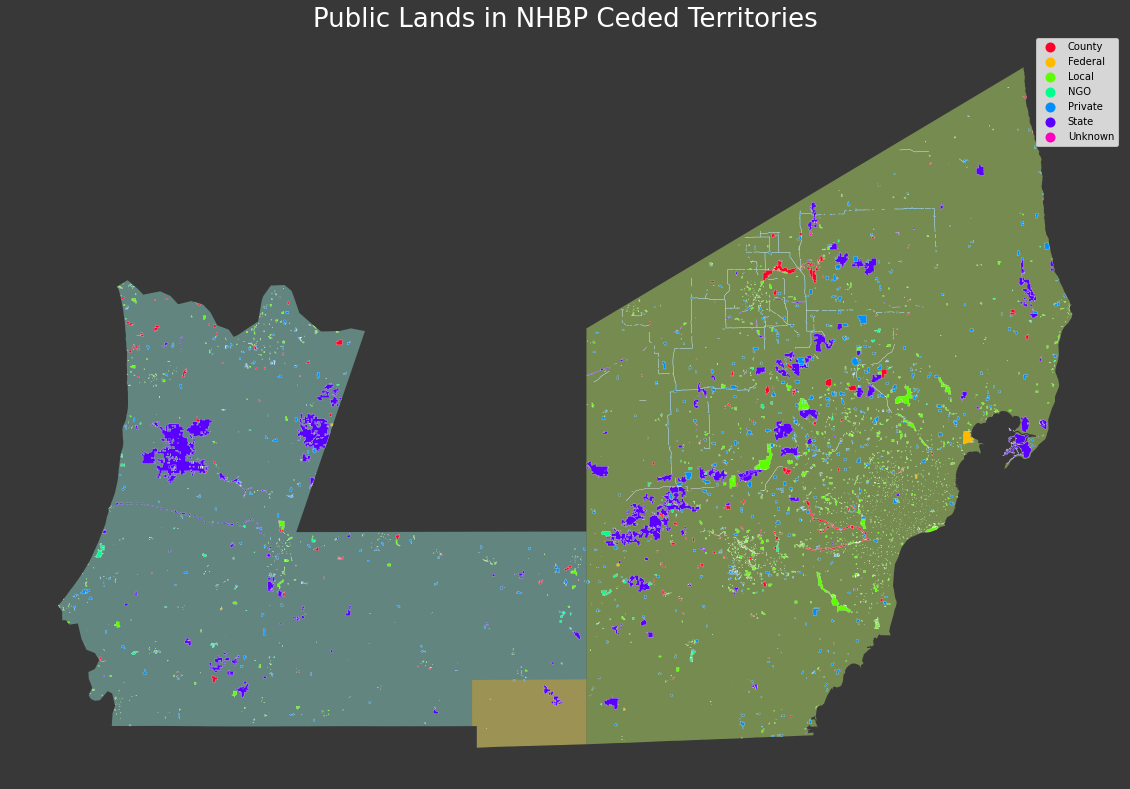

In [ ]:
print('\n\n\n')
# Better way to map multiple layers
fig, ax = plt.subplots(figsize=(20,15),facecolor='#383838')
# facecolor #383838 is matched exactly with Colab dark background
# Needs to be set for pyplot
ax.set_aspect('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
gdf2.plot(ax=ax, column='NAME', alpha=.5, cmap='Set3', linewidth=2)
#gdf2.boundary.plot(ax=ax, edgecolor='black', linewidth=2, alpha=0.8)
joinLands.plot(ax=ax, column='CARL_OWN', legend=True, cmap='gist_rainbow', edgecolor='white', linewidth=.2)
plt.title("Public Lands in NHBP Ceded Territories", fontsize=26, color='white')
ax.set_axis_off()
plt.show()

In [ ]:
# needed to plot data onto basemaps, web mercator projection
gdf2 = gdf2.to_crs('EPSG:3857')
gdf = gdf.to_crs('EPSG:3857')
joinLands = joinLands.to_crs('EPSG:3857')

### Map showing NHBP Ceded Territories and Public Lands with simple basemap
Layers projected into Web Mercator Coordinate System

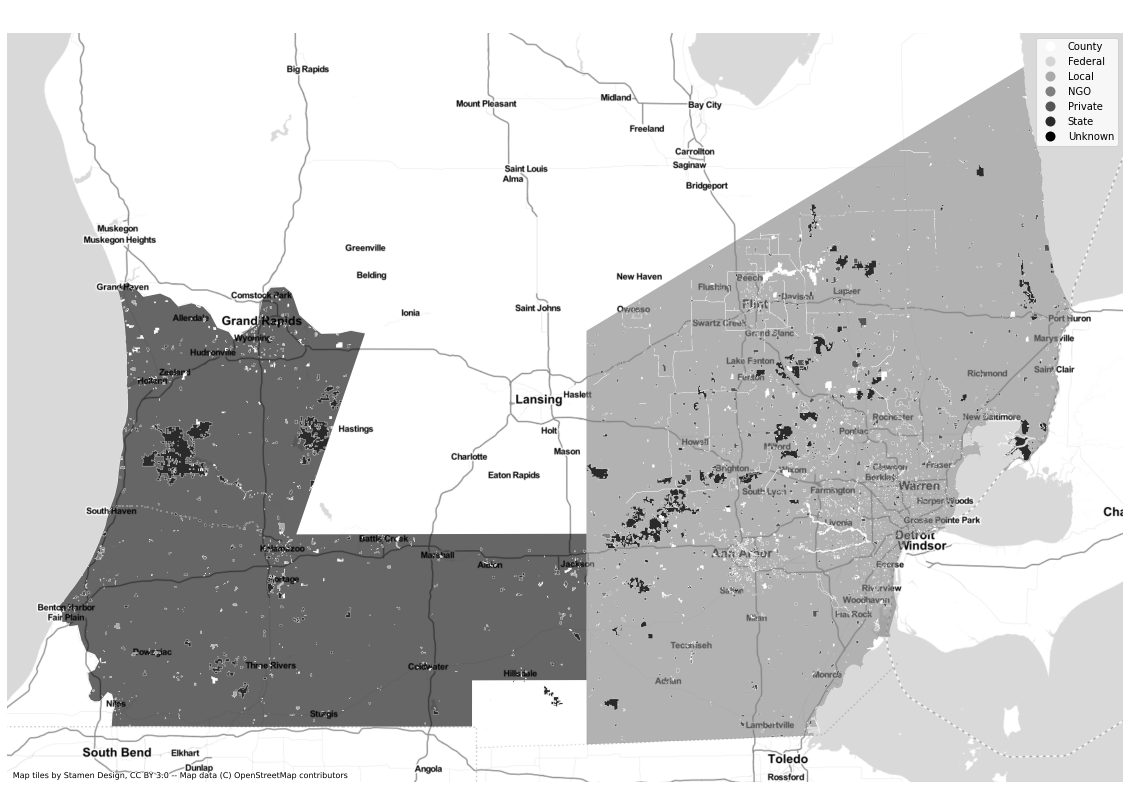

In [ ]:
# Better way to map multiple layers
fig, ax = plt.subplots(figsize=(20,15))
# Needs to be set for pyplot
ax.set_aspect('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
gdf2.plot(ax=ax, column='NAME', alpha=.6, cmap='gray', linewidth=2)
#gdf2.boundary.plot(ax=ax, edgecolor='black', linewidth=2, alpha=0.8)
joinLands.plot(ax=ax, column='CARL_OWN', legend=True, cmap='binary', edgecolor='white', linewidth=.3)
plt.title("Public Lands in Ceded Territories", fontsize=26, color='white')
ax.set_axis_off()
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

### Map showing NHBP Ceded Territories and Public Lands with aerial basemap
Layers projected into Web Mercator Coordinate System

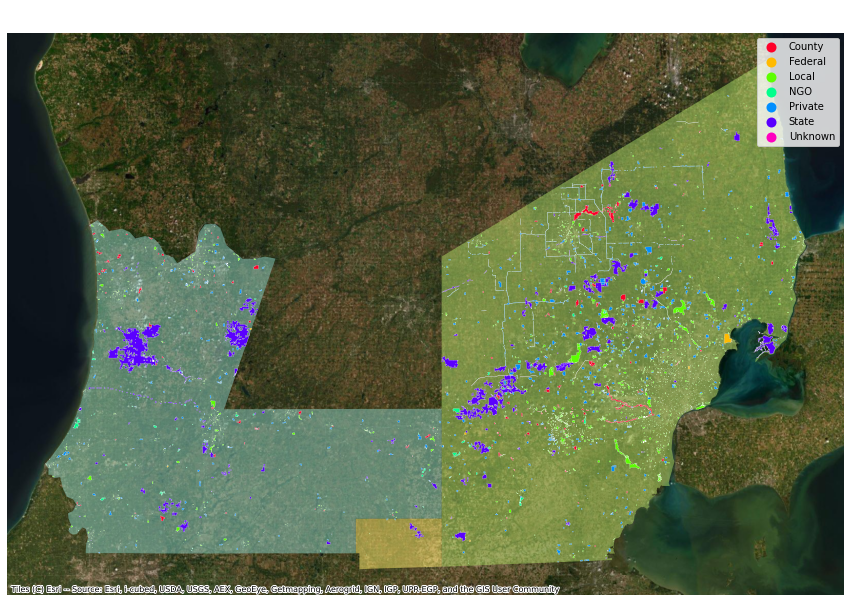

In [ ]:
# Better way to map multiple layers
fig, ax = plt.subplots(figsize=(15,15))
# Needs to be set for pyplot
ax.set_aspect('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
gdf2.plot(ax=ax, column='NAME', alpha=.5, cmap='Set3', linewidth=2)
joinLands.plot(ax=ax, column='CARL_OWN', legend=True, cmap='gist_rainbow', edgecolor='white', linewidth=.2)
plt.title("Public Lands in Ceded Territories", fontsize=26, color='white')
ax.set_axis_off()
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)

In [ ]:
!jupyter nbconvert --output-dir='/content/drive/My Drive/Colab Notebooks/OUTPUTS' --to html --no-input '/content/drive/My Drive/Colab Notebooks/Public Lands in NHBP Ceded Territories.ipynb' 

[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/Public Lands in NHBP Ceded Territories.ipynb to html
[NbConvertApp] Writing 2294112 bytes to /content/drive/My Drive/Colab Notebooks/OUTPUTS/Public Lands in NHBP Ceded Territories.html


## Data Processing Area

In [ ]:
# Workflow Section
# Get Public Lands Layer, clipped to Treaty Boundaries with ArcGIS Pro
userLogin()
landsID = searchByKeywords(gis, 'Public_Lands')

In [ ]:
# generate GeoDataframe from clipped public lands layer
gdf = FeatServiceToGDF(gis, landsID[6].id)

In [ ]:
# conversion worked, and was fairly quick
gdf.plot()

In [ ]:
gdf.head()

In [ ]:
# reduce the number of columns
gdfCol = ['CARL_MGR','CARL_OWN','acres','category','mgmt_desc','mgmt_type','state_nm','mgr_name','own_name','geometry']
gdf = gdf[gdfCol]
gdf.head().T

In [ ]:
# Test to ensure geometry still intact after reducing number of columns
gdf.plot()

In [ ]:
gdf.head()

In [ ]:
# Plot public lands locations
fig, ax = plt.subplots(figsize=(15,15))
ax.set_xticklabels([])
ax.set_yticklabels([])
gdf.plot(ax=ax, column='mgmt_type');

In [ ]:
# now get royce treaty layer from AGOL
treatyID = 'a6deb9880f84418ea0364d4f153a65d1'
gdf2 = FeatServiceToGDF(gis, treatyID)

In [ ]:
# Plotting treaty areas works fine
gdf2.plot()

In [ ]:
# Keep only NHBP Ceded Territories
treaties = ['Detroit Treaty 1807','CHICAGO TREATY1821','Foot of the Rapids 1817']
gdf2 = gdf2[(gdf2['NAME']==treaties[0]) | (gdf2['NAME']==treaties[1]) | (gdf2['NAME']==treaties[2])]
gdf2.head()

In [ ]:
# back to WGS84
gdf2 = gdf2.to_crs('EPSG:4326')
gdf = gdf.to_crs('EPSG:4326')

In [ ]:
# Plotting both together, need to reproject gdf2 into EPSG:4326
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xticklabels([])
ax.set_yticklabels([])
gdf2.plot(ax=ax, column='NAME', alpha=0.3, edgecolor='k');
# gdf2.boundary.plot(ax=ax)
gdf.plot(ax=ax, column='CARL_OWN', legend=True, cmap='gist_rainbow')
#fig.savefig("pieCharts.png")

In [ ]:
# Better way to map multiple layers
fig, ax = plt.subplots(figsize=(20,15),facecolor='#383838')
# facecolor #383838 is matched exactly with Colab dark background
# Needs to be set for pyplot
ax.set_aspect('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
gdf2.plot(ax=ax, column='NAME', alpha=.5, cmap='Set3', linewidth=2)
#gdf2.boundary.plot(ax=ax, edgecolor='black', linewidth=2, alpha=0.8)
gdf.plot(ax=ax, column='CARL_OWN', legend=True, cmap='gist_rainbow', edgecolor='white', linewidth=.2)
plt.title("Public Lands in NHBP Ceded Territories", fontsize=26, color='white')
ax.set_axis_off()
plt.show()

In [ ]:
# needed to plot data onto basemaps, web mercator projection
gdf2 = gdf2.to_crs('EPSG:3857')
gdf = gdf.to_crs('EPSG:3857')

In [ ]:
# Yeah here are the public lands with the basemap!
ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

In [ ]:
# Very cool, change the basemap type!
ax = gdf.plot(figsize=(10, 10), alpha=1, edgecolor='blue')
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()

In [ ]:
# Better way to map multiple layers
fig, ax = plt.subplots(figsize=(15,15))
# Needs to be set for pyplot
ax.set_aspect('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
gdf2.plot(ax=ax, column='NAME', alpha=.6, cmap='gray', linewidth=2)
#gdf2.boundary.plot(ax=ax, edgecolor='black', linewidth=2, alpha=0.8)
gdf.plot(ax=ax, column='CARL_OWN', legend=True, cmap='binary', edgecolor='white', linewidth=.3)
plt.title("Public Lands in Ceded Territories", fontsize=26, color='white')
ax.set_axis_off()
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

In [ ]:
# Export Clipped Public Lands as Excel, remove unneccesary geometry column
gdfExport = gdf.drop(['geometry'], axis='columns')
exportDataFrame(gdfExport, 'NHBP-PUBLIC-CEDED.xlsx')

In [ ]:
gdf2.head()

In [ ]:
gdf2 = gdf2.to_crs('EPSG:4326')
gdf = gdf.to_crs('EPSG:4326')

In [ ]:
# Yeah this works like a charm!  Can plot and analyze each treaty area separately
chicago1821 = joinLands[joinLands['NAME'] == 'CHICAGO TREATY1821']
rapids1817 = joinLands[joinLands['NAME'] == 'Foot of the Rapids 1817']
detroit1807 = joinLands[joinLands['NAME'] == 'Detroit Treaty 1807']

In [ ]:
# Spatial join successful for each separate Treaty polygon
detroit1807.plot(figsize=(10,10))

In [ ]:
# using 'intersects' parameter
gdf = gdf[gdf['state_nm'] == 'Michigan']
joinLands = gpd.sjoin(gdf, gdf2, op='intersects')
# Testing a spatial join


In [ ]:
# Yeah this works like a charm!  Can plot and analyze each treaty area separately
chicago1821 = joinLands[joinLands['NAME'] == 'CHICAGO TREATY1821']
rapids1817 = joinLands[joinLands['NAME'] == 'Foot of the Rapids 1817']
detroit1807 = joinLands[joinLands['NAME'] == 'Detroit Treaty 1807']

In [ ]:
# Testing out some stats, total areas not adding up
print(f'Total Public Lands: {joinLands.CARL_MGR.count()}')
print(f'Chicago: {chicago1821.CARL_MGR.count()} - Detroit: {detroit1807.CARL_MGR.count()} - Rapids: {rapids1817.CARL_MGR.count()}')
print(f'Total Added: {chicago1821.CARL_MGR.count() + detroit1807.CARL_MGR.count() + rapids1817.CARL_MGR.count()}')
print(f'Total Public Lands: {(joinLands.acres.sum()).round(1)}')
print(f'Chicago: {chicago1821.acres.sum()} - Detroit: {detroit1807.acres.sum()} - Rapids: {rapids1817.acres.sum()}')
print(f'Total Added: {int(chicago1821.acres.sum() + detroit1807.acres.sum() + rapids1817.acres.sum())}')

In [ ]:
#gdf = gdf.drop([897])
bigLands = gdf[gdf['acres'] > 10000]
display(bigLands.shape, bigLands['acres'].sum())
bigLands

In [ ]:
##Start of data processing, sjoin using within
# using within parameter
gdf = gdf[gdf['state_nm'] == 'Michigan']
# geopandas spatial join
joinLands = gpd.sjoin(gdf, gdf2, op='within')

In [ ]:
# Create separate dataframes for each Treaty Region
chicago1821 = joinLands[joinLands['NAME'] == 'CHICAGO TREATY1821']
rapids1817 = joinLands[joinLands['NAME'] == 'Foot of the Rapids 1817']
detroit1807 = joinLands[joinLands['NAME'] == 'Detroit Treaty 1807']

In [ ]:
# add extra record to detroit 1807 Treaty Layer
#detroit1807 = detroit1807.append(huron, ignore_index=True)
detBig = detroit1807[detroit1807['acres'] > 10000]
display(detBig.shape, detBig['acres'].sum())
detBig

In [ ]:
# sets value for specifc record in dataframe
detBig.loc[3024,'NAME'] = 'DETROIT TREATY'

In [ ]:
# Get the total Public Lands larger than 10,000
# We can see that both St. Clair Flats and Manistee have been removed.
joinLands = joinLands.append(huron)
bigLands = joinLands[joinLands['acres'] > 10000]
display(bigLands.shape, bigLands['acres'].sum())
joinLands = joinLands.append(huron)
bigLands

In [ ]:
# original gdf has both Huron and St. Clair areas missing from joinLands
bigLands = gdf[gdf['acres'] > 10000]
display(bigLands.shape, bigLands['acres'].sum())
stClair = bigLands[4:5]

In [ ]:
# add to all public lands layer
joinLands = joinLands.append(stClair, ignore_index=True)

In [ ]:
# add to Detroit Treaty Layer
detroit1807 = detroit1807.append(stClair, ignore_index=True)

In [ ]:
# Testing out some stats, total areas not adding up
print(f'Total Public Lands: {joinLands.CARL_MGR.count()}')
print(f'Chicago: {chicago1821.CARL_MGR.count()} - Detroit: {detroit1807.CARL_MGR.count()} - Rapids: {rapids1817.CARL_MGR.count()}')
print(f'Total Added: {chicago1821.CARL_MGR.count() + detroit1807.CARL_MGR.count() + rapids1817.CARL_MGR.count()}')
print(f'Total Public Lands: {(joinLands.acres.sum()).round(1)}')
print(f'Chicago: {chicago1821.acres.sum()} - Detroit: {detroit1807.acres.sum()} - Rapids: {rapids1817.acres.sum()}')
print(f'Total Added: {int(chicago1821.acres.sum() + detroit1807.acres.sum() + rapids1817.acres.sum())}')

In [ ]:
chiBig = chicago1821[chicago1821['acres'] > 10000]
display(chiBig.shape, chiBig['acres'].sum())
chiBig

In [ ]:
detBig = detroit1807[detroit1807['acres'] > 10000]
display(detBig.shape, detBig['acres'].sum())
detBig

In [ ]:
# Testing inital dataframe
print(f'Total Public Lands: {gdf.CARL_MGR.count()}')
print(f'Total Public Lands Area: {int(gdf.acres.sum())}')
print(f'AVG Size: {(gdf.acres.sum()).round(1)/gdf.CARL_MGR.count()}')
print(f'Total Public Lands: {joinLands.CARL_MGR.count()}')
print(f'Total Public Lands: {(joinLands.acres.sum()).round(1)}')
print(f'AVG Size: {(joinLands.acres.sum()).round(1)/joinLands.CARL_MGR.count()}')

In [ ]:
# Wow that's a huge difference!  Let's try a plot!
# Better way to map multiple layers
fig, ax = plt.subplots(figsize=(20,15),facecolor='#383838')
# facecolor #383838 is matched exactly with Colab dark background
# Needs to be set for pyplot
ax.set_aspect('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
gdf.plot(ax=ax, column='CARL_OWN', legend=True, cmap='gist_rainbow', edgecolor='white', linewidth=.2)
plt.title("Public Lands in NHBP Ceded Territories", fontsize=26, color='white')
ax.set_axis_off()
plt.show()

In [ ]:
# Wow that's a huge difference!  Let's try a plot!
# Better way to map multiple layers
fig, ax = plt.subplots(figsize=(20,15),facecolor='#383838')
# facecolor #383838 is matched exactly with Colab dark background
# Needs to be set for pyplot
ax.set_aspect('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
joinLands.plot(ax=ax, column='CARL_OWN', legend=True, cmap='gist_rainbow', edgecolor='white', linewidth=.2)
plt.title("Public Lands in NHBP Ceded Territories", fontsize=26, color='white')
ax.set_axis_off()
plt.show()

In [ ]:
## Use GPD sjoin on original CARL Layer
gis = GIS()
itemID = 'a0836d06d2b644c0bac79734cfcb2acc'
item = gis.content.get(itemID)
item

In [ ]:
fileURL = 'https://opendata.arcgis.com/datasets/a0836d06d2b644c0bac79734cfcb2acc_0.geojson'
gdf3 = gpd.read_file(fileURL)

In [ ]:
gdf3.count()

## Appendices

In [ ]:
# Install and load libraries, may be able to remove some uneeded libraries
%%time 
!apt install gdal-bin python-gdal python3-gdal 
!apt install python3-rtree 
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes 
!pip install folium
!pip install pygeos
!pip install arcgis
!apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
!pip install contextily
!pip install xlsxwriter
from pathlib import Path
import sys
import os
import getpass
from zipfile import ZipFile
import datetime as dt
import requests
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
from arcgis.gis import GIS, Item
from arcgis.env import active_gis
from arcgis.features import FeatureLayerCollection
from arcgis.mapping import WebMap
from arcgis.features import FeatureLayer
from IPython.display import display
import contextily as ctx
from IPython.display import Image
from IPython.display import Markdown as md

In [ ]:
def exportDataFrame(df, exportName):
    try:
      writer = pd.ExcelWriter(exportName, engine='xlsxwriter')
      df.to_excel(writer, sheet_name='Sheet1', index=False)
      writer.save()
      print(f'dataframe successfully exported as: {exportName}')
      #return df
    except:
      print('exportDataFrame function failed')

In [ ]:
# Added functions November 4th
# Collection of all ArcGIS Python API Helper Functions
# user login functions, ask if user would like additional logins
def userLogin():
    userID = input(f'ArcGIS Online USER ID: ')
    passWord = getpass.getpass('PASSWORD: ')
    try:
        global gis
        gis = GIS("https://www.arcgis.com", userID, passWord)
        print(f'SUCCESS - CONNECTED TO: {gis.users.me.username} ACCOUNT as <gis>')
        print(gis)
        addUsers = input(f'Additional User Login(YES/NO)? ')
        if addUsers.upper() == 'YES':
            additionalUserLogin()
        else:
            print(f'YOU MAY NOW PROCEED...')
    except:
        print(f'ERROR DID NOT CONNECT TO: {userID}')

def additionalUserLogin():
    userID = input(f'ArcGIS Online USER ID: ')
    passWord = getpass.getpass('PASSWORD: ')
    try:
        global gis2
        gis2 = GIS("https://www.arcgis.com", userID, passWord)
        print(f'SUCCESS - CONNECTED TO: {gis2.users.me.username} ACCOUNT as <gis2>')
        print(gis2)
    except:
        print(f'ERROR DID NOT CONNECT TO: {userID}')

# get list of all owner AGOL items, print list with title, id, type, and categories
def getUserContent(gisInfo):
    try:
        my_content = gisInfo.content.search(query="owner:" + gisInfo.users.me.username, item_type="", max_items=200)
        for x in my_content:
            strMod = str(x.modified)
            stampInt = int(strMod[0:10])
            print(f'{x.title} - {x.id} - {x.type} - {x.categories} - {dt.datetime.fromtimestamp(stampInt)}')
    except:
        print('ERROR could not get user content')

# Clone item using id of item passed to function
def cloneItem(gisInfo, gisInfo2, cloneID):    
    try:
        itemToClone = gisInfo.content.get(cloneID)
        print('Cloning:' + itemToClone.title + ' - ' + itemToClone.id + ' -',itemToClone.type)
        clonedItem = gisInfo2.content.clone_items(items=[itemToClone])
        print(f'Cloned Item: {clonedItem[0]}')
        #return clonedItem
    except:
        print('ERROR Could Not Clone')

# updated searchByKeywords, returns LIST of items 8-14-2020
def searchByKeywords(gisInfo, searchKeywords):
    try:
        searchContent = gisInfo.content.search(query=f'{searchKeywords}', item_type='', max_items=50)
        x = 0
        for z in searchContent:
          strMod = str(z.modified)
          stampInt = int(strMod[0:10])
          print(f'{x} - {z.title} - {z.id} - {z.type} - {z.categories} - {dt.datetime.fromtimestamp(stampInt)}')
          x += 1
        return searchContent
    except:
        print('ERROR Search not Successful')

# find item by keywords and display visual card
def searchByKeyViz(gisInfo, searchKeywords):
    try:
        searchContent = gisInfo.content.search(query=f'{searchKeywords}', item_type='', max_items=50)
        for z in searchContent:
            print(f'title: {z.title} - itemID: {z.id} - type: {z.type}')
            display(z)
    except:
        print('ERROR Search not Successful')
        
# return all keys and values for item when passed itemID string
def getItemKeysValues(gisInfo, idString):
    try:
        getFeature = gisInfo.content.get(idString)
        for key, value in getFeature.items():
            print(key,': ', value)
    except:
        print('ERROR GET Keys/Values not Successful')
        
# takes itemID and gets and returns layerObject if exist, otherwise 'no layers found'
def getLayers(gisInfo, idString):
    getFeature = gisInfo.content.get(idString)
    try:
        featureLayers = getFeature.layers
        z = 0 
        for x in featureLayers:
            print(f'Layer {z}: {x}')
            z += 1
    except:
        print('no layers found')
    return featureLayers

# supply feature layer itemID, and the layer number to display table head 
def getLayerTable(gisInfo, idString, layerNum):
    try:
        layerOutput = getLayers(gisInfo, idString)
        queryLayer = layerOutput[layerNum].query()
        display(queryLayer.sdf.head())
    except:
        print('ERROR no Layers Found')
        
# delete item by itemID
def deleteItem(gisInfo, idString):
    itemToDelete = gisInfo.content.get(idString)
    display(itemToDelete)
    delQuest = input(f'Are you sure you want to delete: {itemToDelete.title}')
    try:
        if delQuest.upper() == 'YES':
            print(f'DELETING: {itemToDelete.title}')
            itemToDelete.delete()
        else:
            print(f'NOT DELETING: {itemToDelete.title}')
    except:
        print(f'ERROR failed to DELETE: {itemToDelete.title}')

# delete multiple items by searchByKeywords() returned LIST 8-14-2020
def delMultiple(gisInfo, itemList):
  try:
    print('List of Items to be Deleted: ')
    for z in itemList:
          strMod = str(z.modified)
          stampInt = int(strMod[0:10])
          print(f'{z.title} - {z.id} - {z.type} - {z.categories} - {dt.datetime.fromtimestamp(stampInt)}')
    delQuest = input(f'SURE YOU WANT TO DELETE THESE?!?!?')
    if delQuest.upper() == 'YES':
      for z in itemList:
          print(f'DELETING {z.title}')
          itemToDelete = gisInfo.content.get(z.id)
          itemToDelete.delete()
      print('<FINISHED DELETION PROCESS>')
    else:
      print(f'NOT DELETING!')
  except:
      print(f'ERROR failed to DELETE: {itemToDelete.title}')

# List all user Dashboards and Dashboard Webmmaps
def ListAllDashWebmaps(gisInfo):
  source_admin_inventory = get_user_items(gisInfo, gisInfo.users.me)
  x = 0
  try:
    for dashboard in source_admin_inventory['Dashboard']:
        print(x, dashboard)
        dashWebmap = get_dash_wm(gisInfo, dashboard)
        print(dashWebmap)
        x += 1
  except:
    print("ERROR COULD NOT LIST DASHBOARDS") 

# generic function update targetLayer Features based on Table Records
def updateLayFeatFromTable(gisInfo, targetLayerID, matchAttrib, targetAttrib, sourceAttrib):
  try:
    getLayers = gisInfo.content.get(targetLayerID)
    targetLayer = getLayers.layers
    layerFeatures = targetLayer[0].query()
    sourceTable = getLayers.tables
    tableFeatures = sourceTable[0].query()
    for tableFeature in tableFeatures:
      tableFeatureID = tableFeature.attributes[matchAttrib]
      for layerFeature in layerFeatures:
        layerFeatureID = layerFeature.attributes[matchAttrib]
        if tableFeatureID == layerFeatureID:
          targetValue = tableFeature.attributes[sourceAttrib]
          layerFeature.set_value(targetAttrib, targetValue)
          print(f'feature: {layerFeatureID} from tableFeature: {tableFeatureID} set {targetAttrib} as: {targetValue}')
    layerEdits = targetLayer[0].edit_features(updates=layerFeatures)
    editCounter = 0
    for edits in layerEdits['updateResults']:
      editCounter+=1
    print(f'updated {getLayers.title} with {editCounter} edits from {getLayers.tables[0]}')
  except:
    print(f'update features failed for {getLayers.title}')
  
# generic function update targetLayer Features based on Table Record, adds break list for parameter categories mapping/analysis
# 8-14 Updated to screen for sampling records with blank values: 'None'
def updateLayFeatFromTableBreaks(gisInfo, targetLayerID, matchAttrib, targetAttrib, sourceAttrib, breaksList):
  try:
    getLayers = gisInfo.content.get(targetLayerID)
    targetLayer = getLayers.layers
    layerFeatures = targetLayer[0].query()
    sourceTable = getLayers.tables
    tableFeatures = sourceTable[0].query()
    for tableFeature in tableFeatures:
      #tableFeatureID = tableFeature.attributes[matchAttrib]
      print(tableFeature.attributes['WATER_TEMP'] is None)
      if (tableFeature.attributes['WATER_TEMP'] is None) != True:
        tableFeatureID = tableFeature.attributes[matchAttrib]
        for layerFeature in layerFeatures:
          layerFeatureID = layerFeature.attributes[matchAttrib]
          if tableFeatureID == layerFeatureID:
            targetValue = tableFeature.attributes[sourceAttrib]
            x = 1
            for breakVal in breaksList:
              if targetValue > breakVal:
                print('none')
              else:
                layerFeature.set_value(targetAttrib, x)
                print(f'feature: {layerFeatureID} from tableFeature: {tableFeatureID} set {targetAttrib}: {targetValue} as: {x}')
                break
              x+=1
    layerEdits = targetLayer[0].edit_features(updates=layerFeatures)
    editCounter = 0
    for edits in layerEdits['updateResults']:
      editCounter+=1
    # hide REST infor for updated layers and tables
    # print(f'updated {getLayers.title} with {editCounter} edits from {getLayers.tables[0]}')
    print(f'updated {getLayers.title} with {editCounter} edits')
  except:
    print(f'update features failed for {getLayers.title}')

# download Feature Layer data from AGOL, unzip contents to folder with item.title name
# Export Formats: Shapefile | CSV | File Geodatabase | Feature Collection | GeoJson | Scene Package | KML | Excel
def downloadItem(gisInfo, idString):
    try:
        downloadData = gisInfo.content.get(idString)
        dataPath = Path('/data')
        print(f'Downloading: {downloadData.title} to {dataPath} directory')
        if not dataPath.exists():
          dataPath.mkdir()
        # this portion for feature service
        downloadExport = downloadData.export(title=downloadData.title, export_format="CSV")
        zipPath = downloadExport.download(save_path=dataPath)
        # preparing to extract files to directory with item.title name
        #zipPath = downloadData.download(save_path=dataPath)
        extractPath = dataPath.joinpath(downloadData.title)
        # extract files to /data directory
        zipFiles = ZipFile(zipPath)
        zipFiles.extractall(path=extractPath)
        print(f'list of Files extracted to: {extractPath}')
        print(list(file.name for file in extractPath.glob('*')))
    except:
        print('ERROR DOWNLOAD did not workings!')

def searchItem(gisInfo, searchKeywords, itemType):
    try:
        searchContent = gisInfo.content.search(query=f'{searchKeywords}', item_type=itemType, max_items=25)
        if itemType == 'Feature Service':
            x = 0
            print(f'<Search Query for {searchKeywords}>')
            for z in searchContent:
                strMod = str(z.modified)
                stampInt = int(strMod[0:10])
                print(f'{x} - {z.title} - {z.id} - {z.type} - {z.categories} - {dt.datetime.fromtimestamp(stampInt)}')
                x += 1
            layInd = int(input(f'Index of selected Feature Layer: '))
            addLayer = gisInfo.content.get(searchContent[layInd].id)
            return addLayer
        elif itemType == 'Web Map':
            x = 0
            print(f'<Search Query for {searchKeywords}>')
            for z in searchContent:
                strMod = str(z.modified)
                stampInt = int(strMod[0:10])
                print(f'{x} - {z.title} - {z.id} - {z.type} - {z.categories} - {dt.datetime.fromtimestamp(stampInt)}')
                x += 1
            layInd = int(input(f'Index of selected Feature Layer: ')) or 'NONE'
            #print(searchContent[layInd])
            mapReturn = searchContent[layInd]
            return mapReturn
    except:
        print('ERROR Search not Successful')
        
def quickMap():
  mapType = input(f'(YES) for QuickMap (NO) for Existing: ')
  if mapType.upper() == 'NO':
    mapSize = ['480px','720px','960px']
    print(f'<You entered {mapType} please login below>')
    userLogin() 
    mapKeywords = input(f'Name of WebMap to Search for: ') or ''
    mapObj = searchItem(gis,mapKeywords,'Web Map')
    map = gis.map(mapObj)
    sizeIn = int(input(f'MAP SIZE (0)SMALL (1)MEDIUM (2)HUGE: '))
    map.layout.height = mapSize[sizeIn]
    display(map)
  else:
    print(f'<You entered {mapType} Opening QuickMap>')
    mapList = ['topo','hybrid','streets','dark-gray','terrain']
    mapDimen = ['2D','3D']
    mapSize = ['480px','720px','960px']
    mapLoc = input(f'Location (default=Michigan): ') or 'Michigan'
    mapBaseNum = input(f'Basemap (default=topo (1=hybrid,2=streets,3=dark-gray,4=terrain): ') or 0
    mapDimIn = input(f'ENTER (1) for 3D Map: ') or 0
    atlasLayers = input(f'Layers from Living Atlas(Enter for None): ') or 'NONE'
    gisNone = GIS()
    map = gisNone.map(mapLoc)
    map.basemap = mapList[int(mapBaseNum)]
    if atlasLayers != 'NONE':
        layerDisplay = searchItem(gisNone, atlasLayers,'Feature Service')
        for layrs in layerDisplay.layers:
            map.add_layer(layrs)
    map.mode = mapDimen[int(mapDimIn)]
    sizeIn = int(input(f'MAP SIZE (0)SMALL (1)MEDIUM (2)HUGE: '))
    map.layout.height = mapSize[sizeIn]
    display(map)

# Delete all features from selected Feature Service, may need more debugging
def delAllFeatures(gisInfo, idString):
    delFeatures = gisInfo.content.get(idString)
    display(delFeatures)
    delQuest = input(f'Are you sure you want to delete all the feature in? {delFeatures.title}')
    try:
        if delQuest.upper() == 'YES':
            print('in loop')
            print(f'DELETING ALL FEATURES IN: {delFeatures.title}')
            featDelRes = []
            targetLayer = delFeatures.layers
            layerFeatures = targetLayer[0].query()
            for feature in layerFeatures:
              #print(f'features: {feature.attributes}')
              featDelRes.append(targetLayer[0].edit_features(deletes=str(feature.attributes['objectid'])))
            return featDelRes
        else:
            print(f'NOT DELETING: {delFeatures.title}')
    except:
        print(f'ERROR failed to DELETE: {delFeatures.title}')
      

# update download function to allow export format choice
# added Nov 4th 2020
def downItemFormat(gisInfo, idString):
    try:
        downloadData = gisInfo.content.get(idString)
        dataPath = Path('/data')
        print(f'Downloading: {downloadData.title} to {dataPath} directory')
        if not dataPath.exists():
          dataPath.mkdir()
        # this portion for feature service
        expForm = input(f'Export Format (Shapefile, CSV, GeoJson, KML, Excel): ')
        downloadExport = downloadData.export(title=downloadData.title, export_format=expForm)
        zipPath = downloadExport.download(save_path=dataPath)
        # preparing to extract files to directory with item.title name
        #zipPath = downloadData.download(save_path=dataPath)
        extractPath = dataPath.joinpath(downloadData.title)
        # extract files to /data directory
        zipFiles = ZipFile(zipPath)
        zipFiles.extractall(path=extractPath)
        print(f'list of Files extracted to: {extractPath}')
        print(list(file.name for file in extractPath.glob('*')))
    except:
        print('ERROR DOWNLOAD did not workings!')

# update download function to allow export format choice
# November 3rd, take it all the way from Feature Service to Geodataframe!
def FeatServiceToGDF(gisInfo, idString):
    try:
        downloadData = gisInfo.content.get(idString)
        dataPath = Path('/data')
        print(f'Downloading: {downloadData.title} to {dataPath} directory')
        if not dataPath.exists():
          dataPath.mkdir()
        # this portion for feature service
        expForm = input(f'Export Format (Shapefile, CSV, GeoJson, KML, Excel): ')
        downloadExport = downloadData.export(title=downloadData.title, export_format=expForm)
        zipPath = downloadExport.download(save_path=dataPath)
        # preparing to extract files to directory with item.title name
        #zipPath = downloadData.download(save_path=dataPath)
        extractPath = dataPath.joinpath(downloadData.title)
        # extract files to /data directory
        zipFiles = ZipFile(zipPath)
        zipFiles.extractall(path=extractPath)
        print(f'list of Files extracted to: {extractPath}')
        print(list(file.name for file in extractPath.glob('*')))
        gdf = gpd.read_file(extractPath)
        print(f'GeoDataFrame Returned!')
        return gdf
    except:
        print('ERROR DOWNLOAD did not workings!')

      
# *******ESRI pre-made helper functions********
def is_hosted(gisInfo, item):
    return [keyword for keyword in item.typeKeywords if "Hosted" in keyword] 

# Prints all layers in a webmap, very handy
def print_webmap_inventory(gisInfo, wm):
    wm_obj = WebMap(wm)
    print(f"{wm_obj.item.title}\n{'-'*100}")
    for wm_layer in wm_obj.layers:
        try:
            if is_hosted(Item(gisInfo, wm_layer['itemId'])):
                print(f"{' '*2}{wm_layer['title']:40}HOSTED{' ':5}"
                      f"{wm_layer['layerType']:20}{dict(wm_layer)['itemId']}")
            else:
                print(f"{' '*2}{wm_layer['title']:40}other{' ':6}"
                      f"{wm_layer['layerType']:20}{wm_layer.id}") 
        except:
            print(f"{' '*2}{wm_layer['title']:40}other{' ':6}"
                  f"{wm_layer['layerType']:20}{wm_layer.id}")
    print("\n")

def get_webmap_list(wm):
    wm_obj = WebMap(wm)
    wmList = []
    print(f"{wm_obj.item.title}\n{'-'*100}")
    for wm_layer in wm_obj.layers:
        # print(wm_layer.itemId)
        wmList.append(wm_layer.itemId)
    return(wmList)
    
def displayWebmapLayers(gisInfo, idList):
    for id in idList:
        displayLayer = gisInfo.content.get(id)
        display(displayLayer)

def get_user_items(gisInfo, user):
    user_inventory = {}
    user_items = gisInfo.content.search(query=f"* AND owner:{user.username}", 
                                           max_items=500)
    for item in user_items:
        if item.type not in user_inventory:
            user_inventory[item.type] = [i 
                                         for i in user_items 
                                         if i.type == item.type]
    return user_inventory

def print_user_inventory(inventory):
    for itype, ilist in inventory.items():
        try:
            print(f"{itype}\n{'-'*50}")
            for i in ilist:
                print(f"{' ':3}{i.title:50}")
            print("\n")
        except Exception as e:
            print(f"\t\tOperation failed on: {i.title}")
            print(f"\t\tException: {sys.exc_info()[1]}")
            continue
            
def get_dash_wm(gisInfo, dash):
    return [gisInfo.content.get(widget['itemId']) 
            for widget in dash.get_data()['widgets'] 
            if widget['type'] == "mapWidget"]